In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [296]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [297]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [298]:
data.shape

(215, 15)

In [299]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [300]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [301]:
print(data['gender'].unique())
print(data['ssc_b'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())

['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


In [302]:
data.replace({'M':1,'F':0, 'Central':1,'Mkt&HR':0,'Mkt&Fin':1,'Yes':1,"No":0,'Placed':1,'Not Placed':0}, inplace= True)
data['ssc_b'].replace({'Others':0},inplace= True)
data['hsc_b'].replace({'Others':0}, inplace= True)
data['salary'].fillna(0, inplace = True)
data['salary'] = data['salary'].astype('int64')
data = pd.get_dummies(data = data, columns = ['hsc_s', 'degree_t'])

In [303]:
data.drop(['sl_no', 'hsc_s_Commerce', 'degree_t_Comm&Mgmt'], inplace = True, axis = 'columns')

In [304]:
# data['salary'].fillna(data['salary'].mean(),inplace = True)
# data['salary'] = data['salary'].astype('int64')

In [305]:
data.isnull().sum()

gender               0
ssc_p                0
ssc_b                0
hsc_p                0
hsc_b                0
degree_p             0
workex               0
etest_p              0
specialisation       0
mba_p                0
status               0
salary               0
hsc_s_Arts           0
hsc_s_Science        0
degree_t_Others      0
degree_t_Sci&Tech    0
dtype: int64

<Axes: >

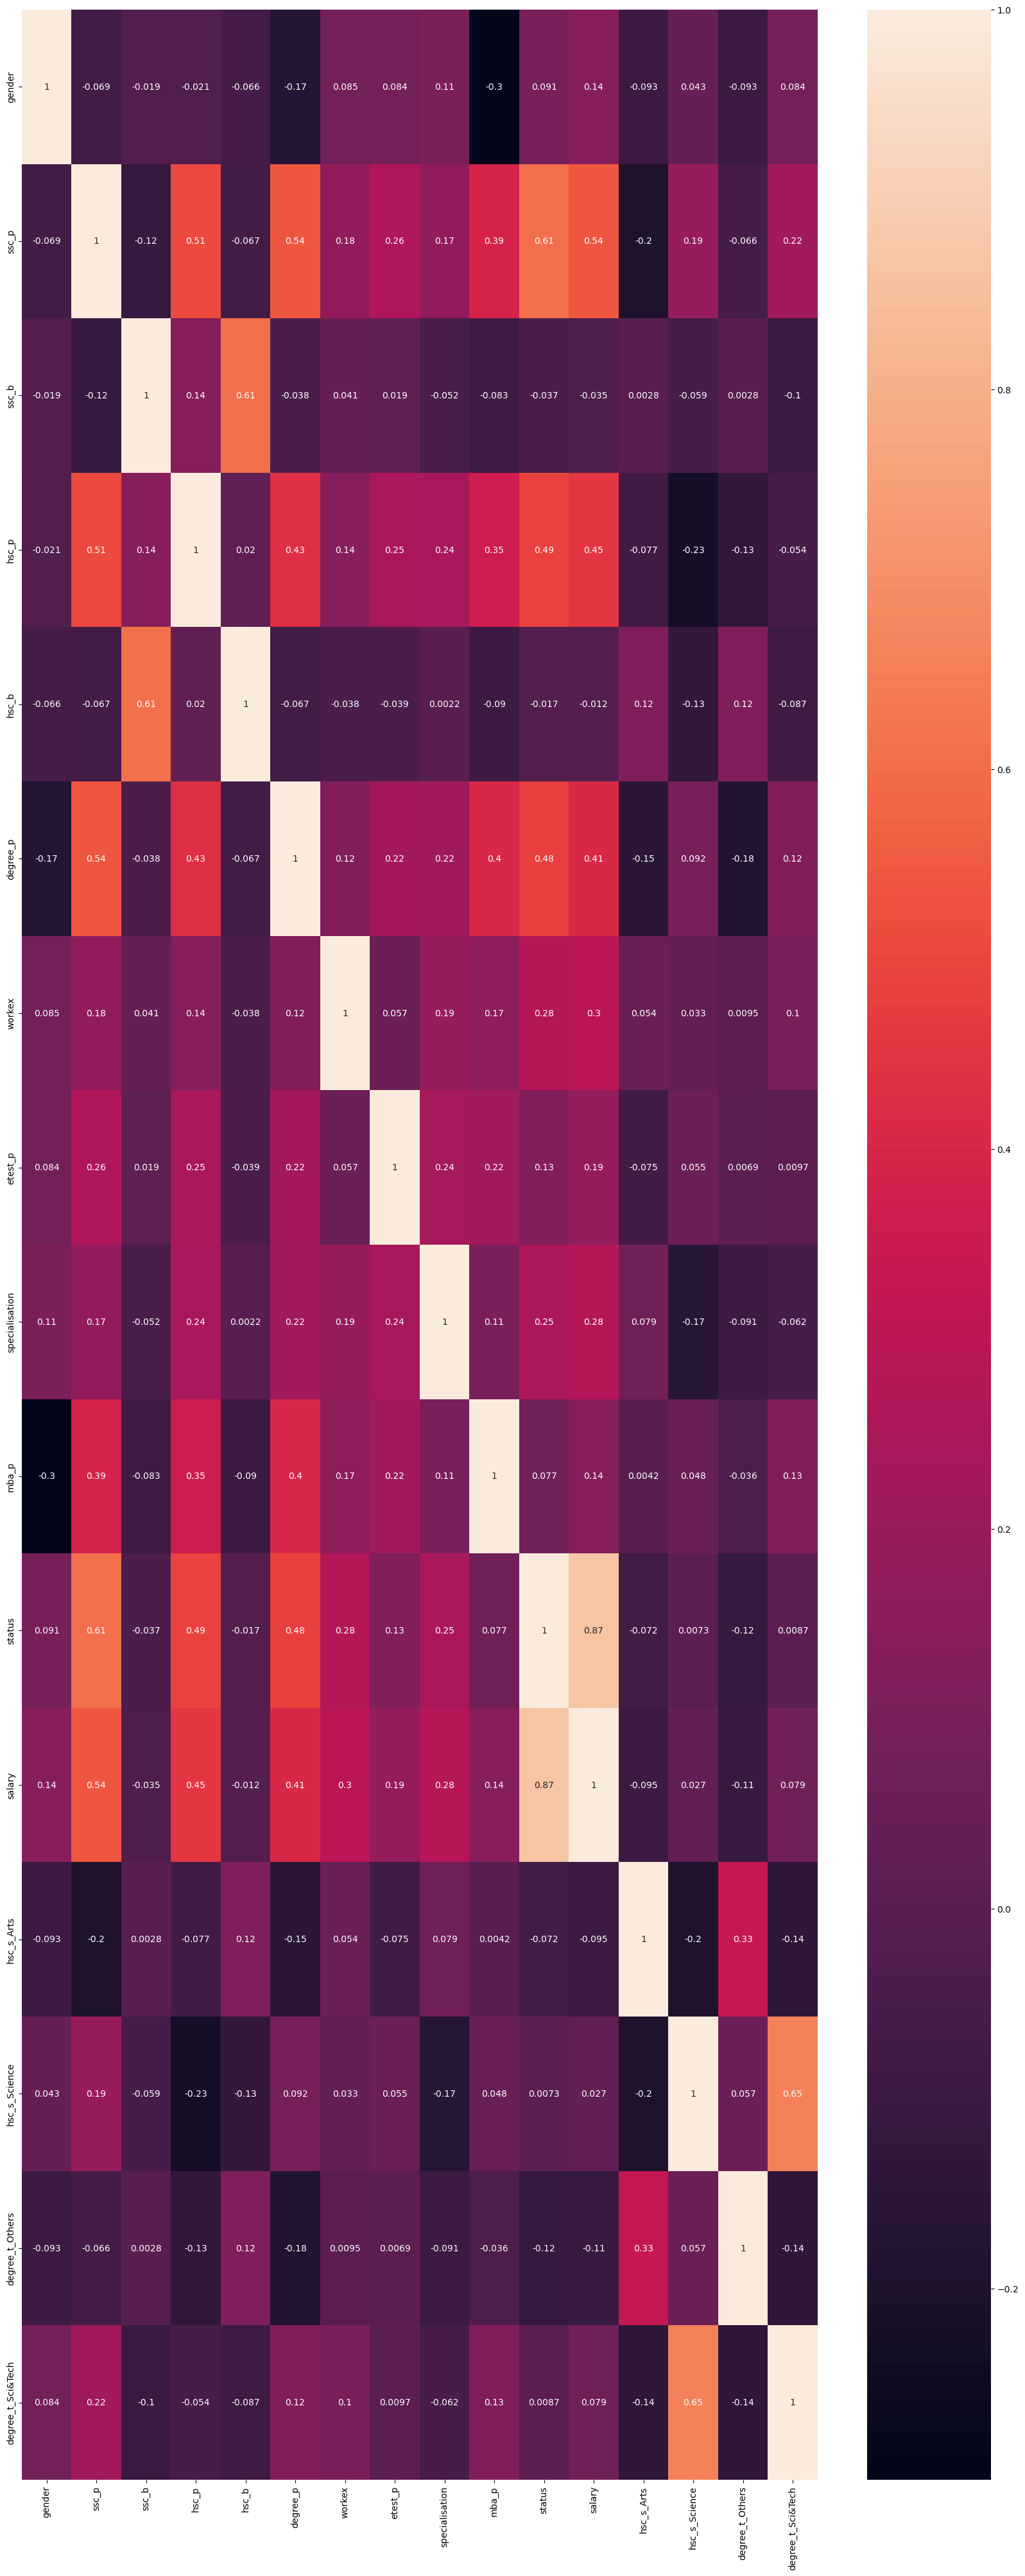

In [306]:
plt.figure(figsize = (20, 50))
sns.heatmap(data.corr() , annot= True )

In [307]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000,0,0,0,0


In [308]:
dummy_data = data.copy()
Y = dummy_data['status']
Y1 = dummy_data['salary']
X = dummy_data.drop(['salary', 'status'],axis = 'columns')

In [309]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,0,0,0,0


In [310]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score,precision_score ,recall_score, classification_report, r2_score, mean_squared_error, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [311]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = scaler.fit_transform(X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])

In [312]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [313]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size = 0.2)

In [314]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

c:\Users\Hatem Abdul Hakeem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [315]:
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred))
print("Precision Score = ", precision_score(Y_test, Y_pred))
print("Recall Score = ", recall_score(Y_test, Y_pred))
print("F1 Score = ", f1_score(Y_test, Y_pred))

Accuracy Score =  0.7441860465116279
Precision Score =  0.7567567567567568
Recall Score =  0.9333333333333333
F1 Score =  0.835820895522388


In [316]:
model1=LinearRegression()
model1.fit(X1_train,Y1_train)
Y1_pred=model1.predict(X1_test)

In [317]:
print('MSE = ', mean_squared_error(Y1_test, Y1_pred))
print('R2 = ', r2_score(Y1_test, Y1_pred))
print('Y1_pred=',Y1_pred)
# print('Y_pred=',Y_pred)

MSE =  13936707685.172607
R2 =  0.2968837992652771
Y1_pred= [163342.22531121 256568.98205694 192321.15464328 225285.47678993
 212776.19804843 279714.82878728 276944.96714993 232456.7581762
  93749.73403121 101583.82783389 118671.59163257  92371.96735582
 202320.25191423 240510.55341642 129523.70239346  98157.75519932
 203087.75028858 142130.44293105  64426.73569696 127663.32591149
 169468.29909395 248819.90793878 301883.2542026  210364.34661228
 168465.62180304 123988.7823713   17696.34198727 311728.05407971
 103271.39634157  53621.80562455 -31577.71069422 325274.21897658
 160519.06316592  80834.75264287 282338.30907554  39698.51424503
 390476.24079444 371577.85746266 110014.09609409 247033.39696022
  26943.24732892 262331.60843506 156832.56632612]


In [318]:
import pickle

# After training your model
model = 'Placement_Data_Full_Class.csv' # Your trained model object
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [319]:
with open("model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [320]:
dec= DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)
dec.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [321]:
print('Training set score: {:.4f}'.format(dec.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(dec.score(X_test, Y_test)))

Training set score: 0.5665
Test set score: 0.2398


In [322]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X1_train,Y1_train)

y_pred = rf_classifier.predict(X1_test)

accuracy = accuracy_score(Y_pred , Y1_test)
print("Accuracy:", accuracy)


Accuracy: 0.046511627906976744


In [323]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gradient_boost_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost_classifier.fit(X2_train,Y2_train)

y_pred = gradient_boost_classifier.predict(X2_test)

accuracy = accuracy_score(y_pred , Y2_test)
print("Accuracy:", accuracy)


Accuracy: 0.9069767441860465


In [324]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

cart_classifier = DecisionTreeClassifier(random_state=42)
cart_classifier.fit(X2_train,Y2_train)

y_pred = cart_classifier.predict(X2_test)

accuracy = accuracy_score(y_pred , Y2_test)
print("Accuracy:", accuracy)
feature_names=['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p']
tree_rules = export_text(cart_classifier, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

Accuracy: 0.8604651162790697
Decision Tree Rules:
 |--- ssc_p <= 23.50
|   |--- mba_p <= 10.50
|   |   |--- class: 1
|   |--- mba_p >  10.50
|   |   |--- degree_p <= 55.00
|   |   |   |--- sl_no <= 202.00
|   |   |   |   |--- class: 0
|   |   |   |--- sl_no >  202.00
|   |   |   |   |--- sl_no <= 204.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sl_no >  204.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_p >  55.00
|   |   |   |--- etest_p <= 36.50
|   |   |   |   |--- class: 1
|   |   |   |--- etest_p >  36.50
|   |   |   |   |--- class: 0
|--- ssc_p >  23.50
|   |--- ssc_p <= 40.50
|   |   |--- hsc_p <= 22.50
|   |   |   |--- class: 0
|   |   |--- hsc_p >  22.50
|   |   |   |--- degree_p <= 63.50
|   |   |   |   |--- degree_p <= 31.00
|   |   |   |   |   |--- hsc_p <= 36.00
|   |   |   |   |   |   |--- degree_p <= 28.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- degree_p >  28.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |

In [325]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

grid_search.fit(X2_train, Y2_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [327]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000,0,0,0,0
